In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (18,6))

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Figure size 1800x600 with 0 Axes>

In [ ]:
path_to_folder = "/content/drive/MyDrive/A.I./BDC/ml-1m"

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=b022534eb566d13ed152d102c9a5163563260be70f1a9daacd352344d544819d
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("ok").getOrCreate()

In [ ]:
spark

In [ ]:
df_movies = spark.read.option("delimiter", "::").csv("/content/drive/MyDrive/A.I./BDC/ml-1m/movies.dat", header = False)
df_movies = df_movies.selectExpr("_c0 as MovieID", "_c1 as Movie", "_c2 as Genre").show()

+-------+--------------------+--------------------+
|MovieID|               Movie|               Genre|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Animation|Childre...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|        Comedy|Drama|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|Adventure|Children's|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Animation|Children's|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|      Drama|Thriller|
|     17|Sen

In [ ]:
df_ratings = spark.read.option("delimiter", "::").csv("/content/drive/MyDrive/A.I./BDC/ml-1m/ratings.dat")
df_ratings = df_ratings.selectExpr("_c0 as UserID", "_c1 as MovieID", "_c2 as Rating", "_c3 as Timestamp").show()

+------+-------+------+---------+
|UserID|MovieID|Rating|Timestamp|
+------+-------+------+---------+
|     1|   1193|     5|978300760|
|     1|    661|     3|978302109|
|     1|    914|     3|978301968|
|     1|   3408|     4|978300275|
|     1|   2355|     5|978824291|
|     1|   1197|     3|978302268|
|     1|   1287|     5|978302039|
|     1|   2804|     5|978300719|
|     1|    594|     4|978302268|
|     1|    919|     4|978301368|
|     1|    595|     5|978824268|
|     1|    938|     4|978301752|
|     1|   2398|     4|978302281|
|     1|   2918|     4|978302124|
|     1|   1035|     5|978301753|
|     1|   2791|     4|978302188|
|     1|   2687|     3|978824268|
|     1|   2018|     4|978301777|
|     1|   3105|     5|978301713|
|     1|   2797|     4|978302039|
+------+-------+------+---------+
only showing top 20 rows



# Handle dataset

In [ ]:
df_movies = pd.read_csv("/content/drive/MyDrive/A.I./BDC/ml-1m/movies.dat", delimiter="::", encoding='latin-1', header = None, index_col=None)
df_movies.index = df_movies[0]
df_movies = df_movies.drop(df_movies.columns[0], axis = 1)
df_movies = df_movies.rename(columns = {df_movies.columns[0]: "Name",
                                        df_movies.columns[1] : "Genres"})
df_movies = df_movies.rename_axis("MovieID")
df_movies[['Name', 'Year']] = df_movies['Name'].str.extract(r'(.+)\s\((\d+)\)')
df_movies.insert(1, 'Year', df_movies.pop('Year'))
df_movies.head()

<ipython-input-194-101f4d58e609>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movies = pd.read_csv("/content/drive/MyDrive/A.I./BDC/ml-1m/movies.dat", delimiter="::", encoding='latin-1', header = None, index_col=None)


,Name,Year,Genres
MovieID,,,
1,Toy Story,1995,Animation|Children's|Comedy
2,Jumanji,1995,Adventure|Children's|Fantasy
3,Grumpier Old Men,1995,Comedy|Romance
4,Waiting to Exhale,1995,Comedy|Drama
5,Father of the Bride Part II,1995,Comedy


In [ ]:
df_ratings = pd.read_csv("/content/drive/MyDrive/A.I./BDC/ml-1m/ratings.dat", delimiter="::", encoding='latin-1', header = None, index_col=None)
df_ratings = df_ratings.rename(columns = {df_ratings.columns[0]: "UserID",
                                          df_ratings.columns[1]: "MovieID",
                                          df_ratings.columns[2]: "Rating",
                                          df_ratings.columns[3]: "Timestamp"})
df_ratings.head()

<ipython-input-195-623c498b6d73>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_ratings = pd.read_csv("/content/drive/MyDrive/A.I./BDC/ml-1m/ratings.dat", delimiter="::", encoding='latin-1', header = None, index_col=None)


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
df_users = pd.read_csv("/content/drive/MyDrive/A.I./BDC/ml-1m/users.dat", delimiter="::", encoding='latin-1', header = None, index_col=None)
df_users = df_users.rename(columns = {df_users.columns[0]: "UserID",
                                      df_users.columns[1]: "Gender",
                                      df_users.columns[2]: "Age",
                                      df_users.columns[3]: "Occupation",
                                      df_users.columns[4]: "Zip-code"})
df_users.head()

<ipython-input-196-fd4cdf1037f2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_users = pd.read_csv("/content/drive/MyDrive/A.I./BDC/ml-1m/users.dat", delimiter="::", encoding='latin-1', header = None, index_col=None)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


# EDA

In [ ]:
print("Shape of movies:", df_movies.shape)
print("Shape of ratings:", df_ratings.shape)
print("Shape of users:", df_users.shape)
print("Shape of master dataframe:", df.shape)

Shape of movies: (3883, 3)
Shape of ratings: (1000209, 4)
Shape of users: (6040, 5)
Shape of master dataframe: (1000209, 9)


In [ ]:
print(df_movies.nunique())
print(df_ratings.nunique())
print(df_users.nunique())

Name      3840
Year        81
Genres     301
dtype: int64
UserID         6040
MovieID        3706
Rating            5
Timestamp    458455
dtype: int64
UserID        6040
Gender           2
Age              7
Occupation      21
Zip-code      3439
dtype: int64


In [ ]:
rows = df_movies[df_movies.duplicated(subset = ["Name"])]
print(rows)

                                               Name  Year  \
MovieID                                                     
915                                         Sabrina  1954   
957                             Scarlet Letter, The  1926   
1344                                      Cape Fear  1962   
1460                                 That Darn Cat!  1997   
1873                                Misérables, Les  1998   
1941                                         Hamlet  1948   
2059                               Parent Trap, The  1998   
2078                               Jungle Book, The  1967   
2085                                 101 Dalmatians  1961   
2135                                Doctor Dolittle  1967   
2136                           Nutty Professor, The  1963   
2212                     Man Who Knew Too Much, The  1934   
2364                              Godzilla (Gojira)  1984   
2367                                      King Kong  1976   
2389                    

In [ ]:
print(df_movies[df_movies.Name == "Sabrina"])

            Name  Year          Genres
MovieID                               
7        Sabrina  1995  Comedy|Romance
915      Sabrina  1954  Comedy|Romance


Some movies have remastered version.

## NAN

In [ ]:
print(df_movies.isna().any())

Name       True
Year       True
Genres    False
dtype: bool


In [ ]:
print(df_movies[df_movies.isna().any(axis = 1)])

        Name Year  Genres
MovieID                  
1001     NaN  NaN  Comedy


In [ ]:
df_movies = df_movies.fillna(2000)
df_movies.Year = df_movies.Year.values.astype(np.uint)

In [ ]:
df = pd.merge(df_movies, df_ratings, on = "MovieID")
df = pd.merge(df, df_users, on="UserID")
df.drop(["Timestamp", "Zip-code"], axis = "columns", inplace = True)
df

,MovieID,Name,Year,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story,1995,Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas,1995,Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13,1995,Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope,1977,Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List,1993,Drama|War,1,5,F,1,10
...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement,2000,Drama|Thriller,5727,4,M,25,4
1000205,3535,American Psycho,2000,Comedy|Horror|Thriller,5727,2,M,25,4
1000206,3536,Keeping the Faith,2000,Comedy|Romance,5727,5,M,25,4
1000207,3555,U-571,2000,Action|Thriller,5727,3,M,25,4


In [ ]:
# df_movies = df_movies.dropna()
# print(df_movies.isna().any())

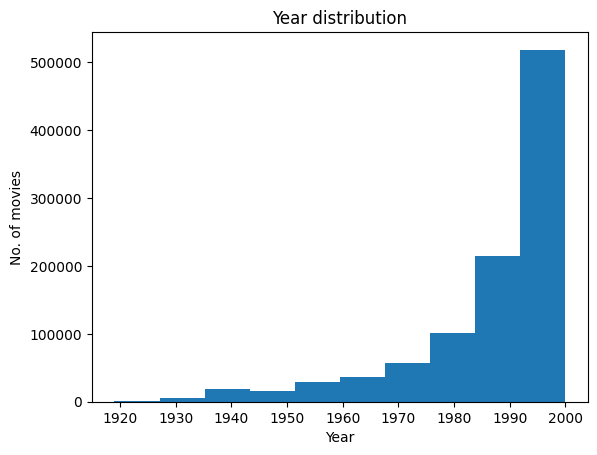

In [ ]:
plt.hist(x = df.Year.astype(np.uint16))
plt.title('Year distribution')
plt.xlabel('Year')
plt.ylabel ('No. of movies')
plt.show()

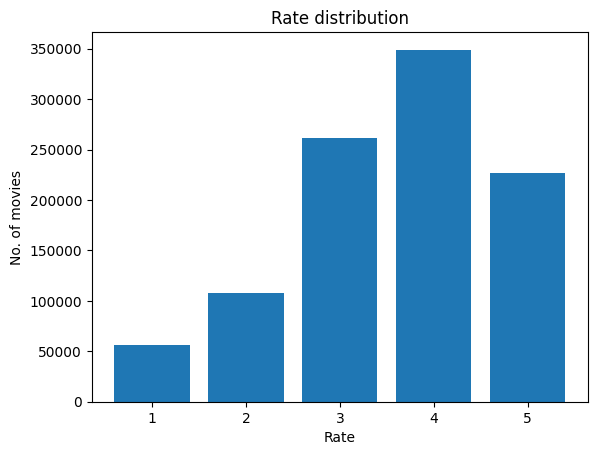

In [ ]:
rating_counts = df.groupby("Rating").size()
plt.bar(rating_counts.index, rating_counts)
plt.title('Rate distribution')
plt.xlabel('Rate')
plt.ylabel ('No. of movies')
plt.show()

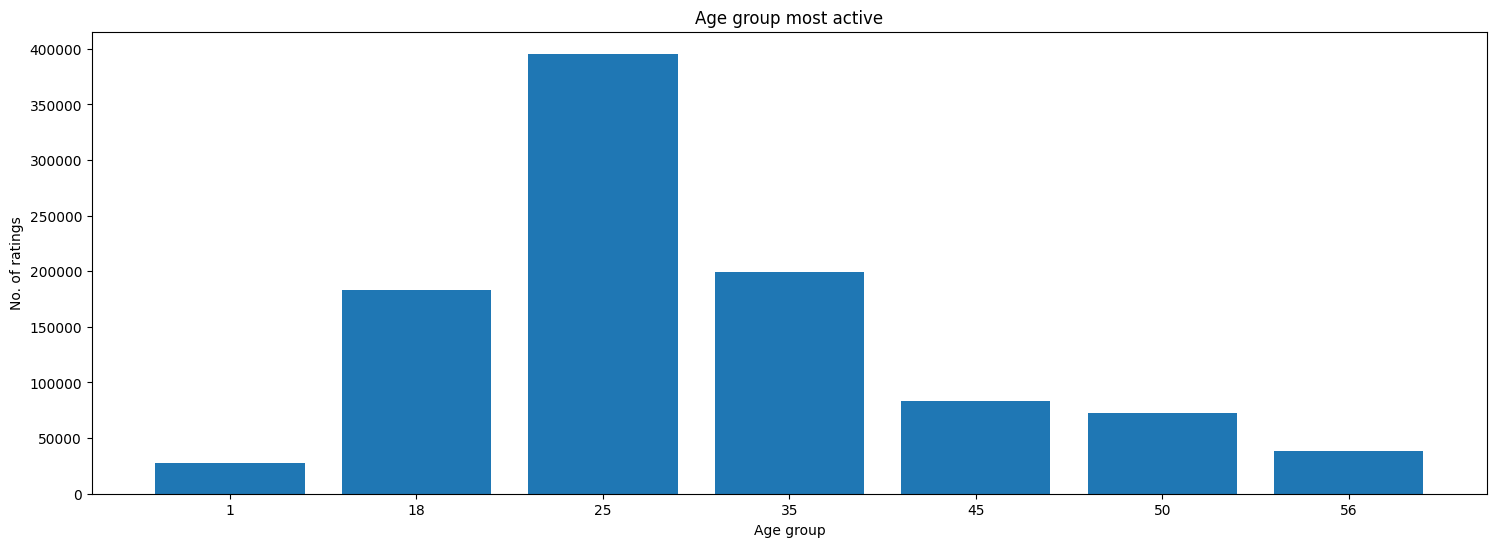

In [ ]:
age_counts = df.groupby("Age").size()
age_counts_idx = list(age_counts.index)
idx = [str(idx) for idx in age_counts_idx]

plt.figure(figsize = (18, 6))
age_counts_idx = age_counts.index
plt.bar(idx, list(age_counts))
plt.ylabel("No. of ratings")
plt.xlabel("Age group")
plt.title("Age group most active")
plt.show()

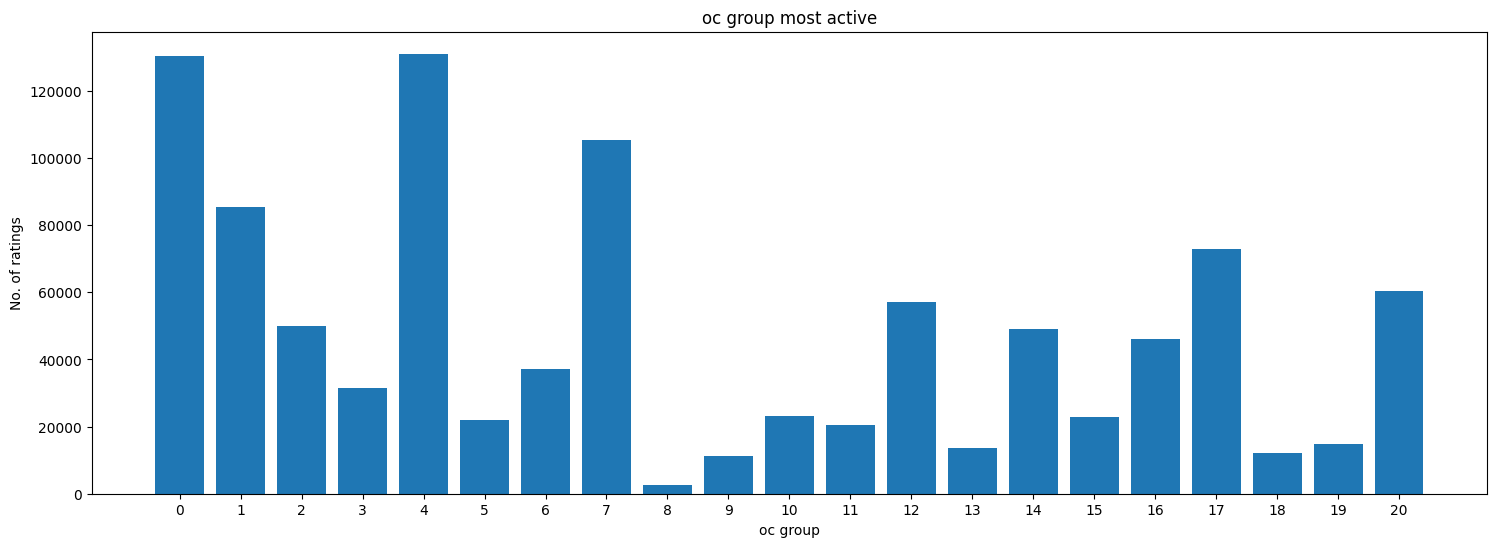

In [ ]:
oc_counts = df.groupby("Occupation").size()
oc_counts_idx = list(oc_counts.index)
idx = [str(idx) for idx in oc_counts_idx]

plt.figure(figsize = (18, 6))
oc_counts_idx = oc_counts.index
plt.bar(idx, list(oc_counts))
plt.ylabel("No. of ratings")
plt.xlabel("oc group")
plt.title("oc group most active")
plt.show()

<ipython-input-210-74b67c152104>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


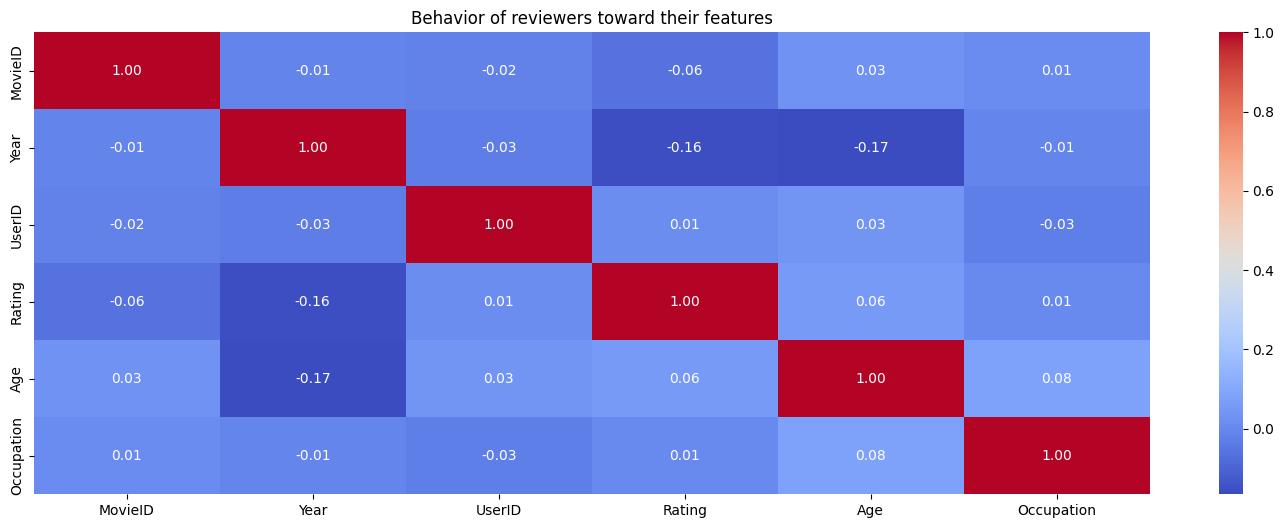

In [ ]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(18, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Behavior of reviewers toward their features")
plt.show()

In [ ]:
most_active_ratings = df.groupby("Name").size().sort_values(ascending = False)[:30]
print(most_active_ratings)

Name
American Beauty                                   3428
Star Wars: Episode IV - A New Hope                2991
Star Wars: Episode V - The Empire Strikes Back    2990
Star Wars: Episode VI - Return of the Jedi        2883
Jurassic Park                                     2672
Saving Private Ryan                               2653
Terminator 2: Judgment Day                        2649
Matrix, The                                       2590
Back to the Future                                2583
Silence of the Lambs, The                         2578
Men in Black                                      2538
Raiders of the Lost Ark                           2514
Fargo                                             2513
Sixth Sense, The                                  2459
Braveheart                                        2443
Shakespeare in Love                               2369
Princess Bride, The                               2318
Schindler's List                                  2304
L.A. 

In [ ]:
most_positive_ratings = df.groupby("Name", as_index = False).agg({"Rating": 'mean'})
top_30 = most_positive_ratings.sort_values("Rating", ascending = False)[:30]
print(top_30)

                                                   Name    Rating
3008                                      Smashing Time  5.000000
3051                                    Song of Freedom  5.000000
2423                                  One Little Indian  5.000000
3437                                   Ulysses (Ulisse)  5.000000
248                                           Baby, The  5.000000
1196                                   Follow the Bitch  5.000000
2868                 Schlafes Bruder (Brother of Sleep)  5.000000
1290                        Gate of Heavenly Peace, The  5.000000
405                                   Bittersweet Motel  5.000000
2003                                              Lured  5.000000
1607                       I Am Cuba (Soy Cuba/Ya Kuba)  4.800000
1850                                           Lamerica  4.750000
198                                    Apple, The (Sib)  4.666667
2849                                            Sanjuro  4.608696
2905  Seve